<a href="https://colab.research.google.com/github/Ahsanbeg/Multiple-Disease-Prediction/blob/main/Parkinson's_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Collection & Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv(r"C:\Users\susha\machine learning\OneDrive_2025-03-12\Medical diagnosis using AI\Datasets\parkinson_data.csv")

In [7]:
# printing the first 5 rows of the dataframe

parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [11]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [15]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [17]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [23]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [27]:
parkinsons_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Data Pre-Processing

Separating the features & Target

In [31]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [33]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [35]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [43]:
scaler = StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [49]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


## **Feature Selection - With Correlation**


In [54]:
corr_df = pd.DataFrame(X_train)
correlation = corr_df.corr()
correlation

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.411874,0.607830,-0.101380,-0.344577,-0.058731,-0.084886,-0.058725,-0.106337,-0.075967,...,-0.078999,-0.106934,-0.034537,0.059567,-0.378747,-0.407923,-0.403130,-0.233148,0.140885,-0.349624
1,0.411874,1.000000,0.081232,0.128430,0.006625,0.124199,0.123354,0.124184,0.016231,0.058620,...,0.010695,0.014661,0.172976,-0.040270,-0.116157,-0.323202,-0.024969,0.042804,0.162772,-0.003285
2,0.607830,0.081232,1.000000,-0.125290,-0.261051,-0.085559,-0.080014,-0.085474,-0.159771,-0.127646,...,-0.111255,-0.170158,-0.114652,0.205685,-0.414710,-0.011054,-0.386459,-0.213747,-0.121229,-0.331130
3,-0.101380,0.128430,-0.125290,1.000000,0.943829,0.991042,0.976139,0.991041,0.775038,0.807445,...,0.764698,0.751628,0.920562,-0.738652,0.367026,0.050785,0.701863,0.391307,0.457060,0.730133
4,-0.344577,0.006625,-0.261051,0.943829,1.000000,0.933227,0.900629,0.933233,0.718815,0.727982,...,0.663089,0.713342,0.871460,-0.671729,0.437730,0.100276,0.730724,0.375066,0.340885,0.741016
5,-0.058731,0.124199,-0.085559,0.991042,0.933227,1.000000,0.960108,1.000000,0.767026,0.794694,...,0.744591,0.751548,0.932983,-0.732193,0.348053,0.012951,0.657388,0.333126,0.449567,0.680129
6,-0.084886,0.123354,-0.080014,0.976139,0.900629,0.960108,1.000000,0.960108,0.800286,0.841047,...,0.811691,0.764040,0.863768,-0.743578,0.344410,0.140549,0.722696,0.417039,0.443762,0.775791
7,-0.058725,0.124184,-0.085474,0.991041,0.933233,1.000000,0.960108,1.000000,0.766987,0.794655,...,0.744560,0.751517,0.932997,-0.732116,0.347949,0.012914,0.657350,0.333049,0.449539,0.680109
8,-0.106337,0.016231,-0.159771,0.775038,0.718815,0.767026,0.800286,0.766987,1.000000,0.987291,...,0.949029,0.987052,0.736474,-0.847489,0.477296,0.117853,0.660393,0.465799,0.529502,0.696574
9,-0.075967,0.058620,-0.127646,0.807445,0.727982,0.794694,0.841047,0.794655,0.987291,1.000000,...,0.960779,0.962189,0.754502,-0.839121,0.436988,0.126621,0.659657,0.470249,0.531335,0.700376


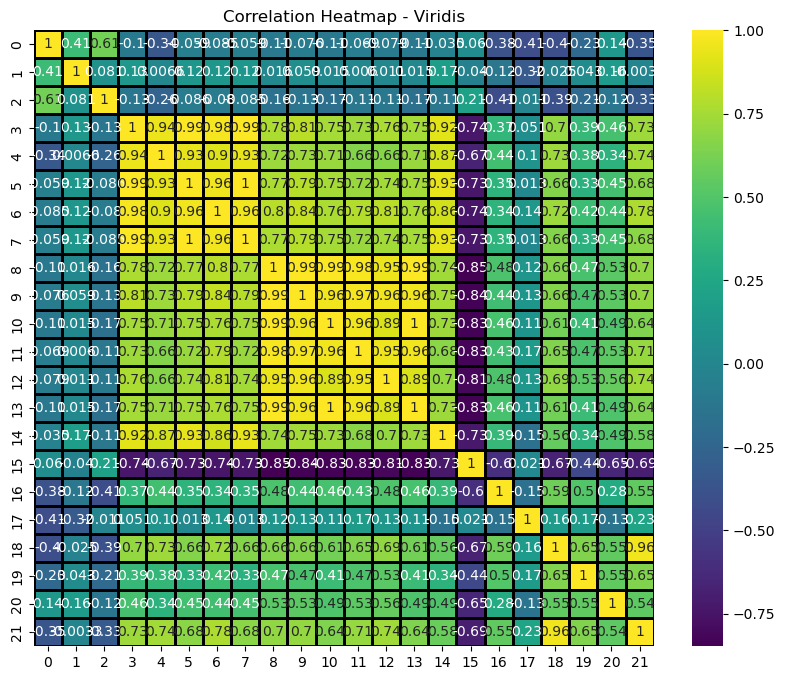

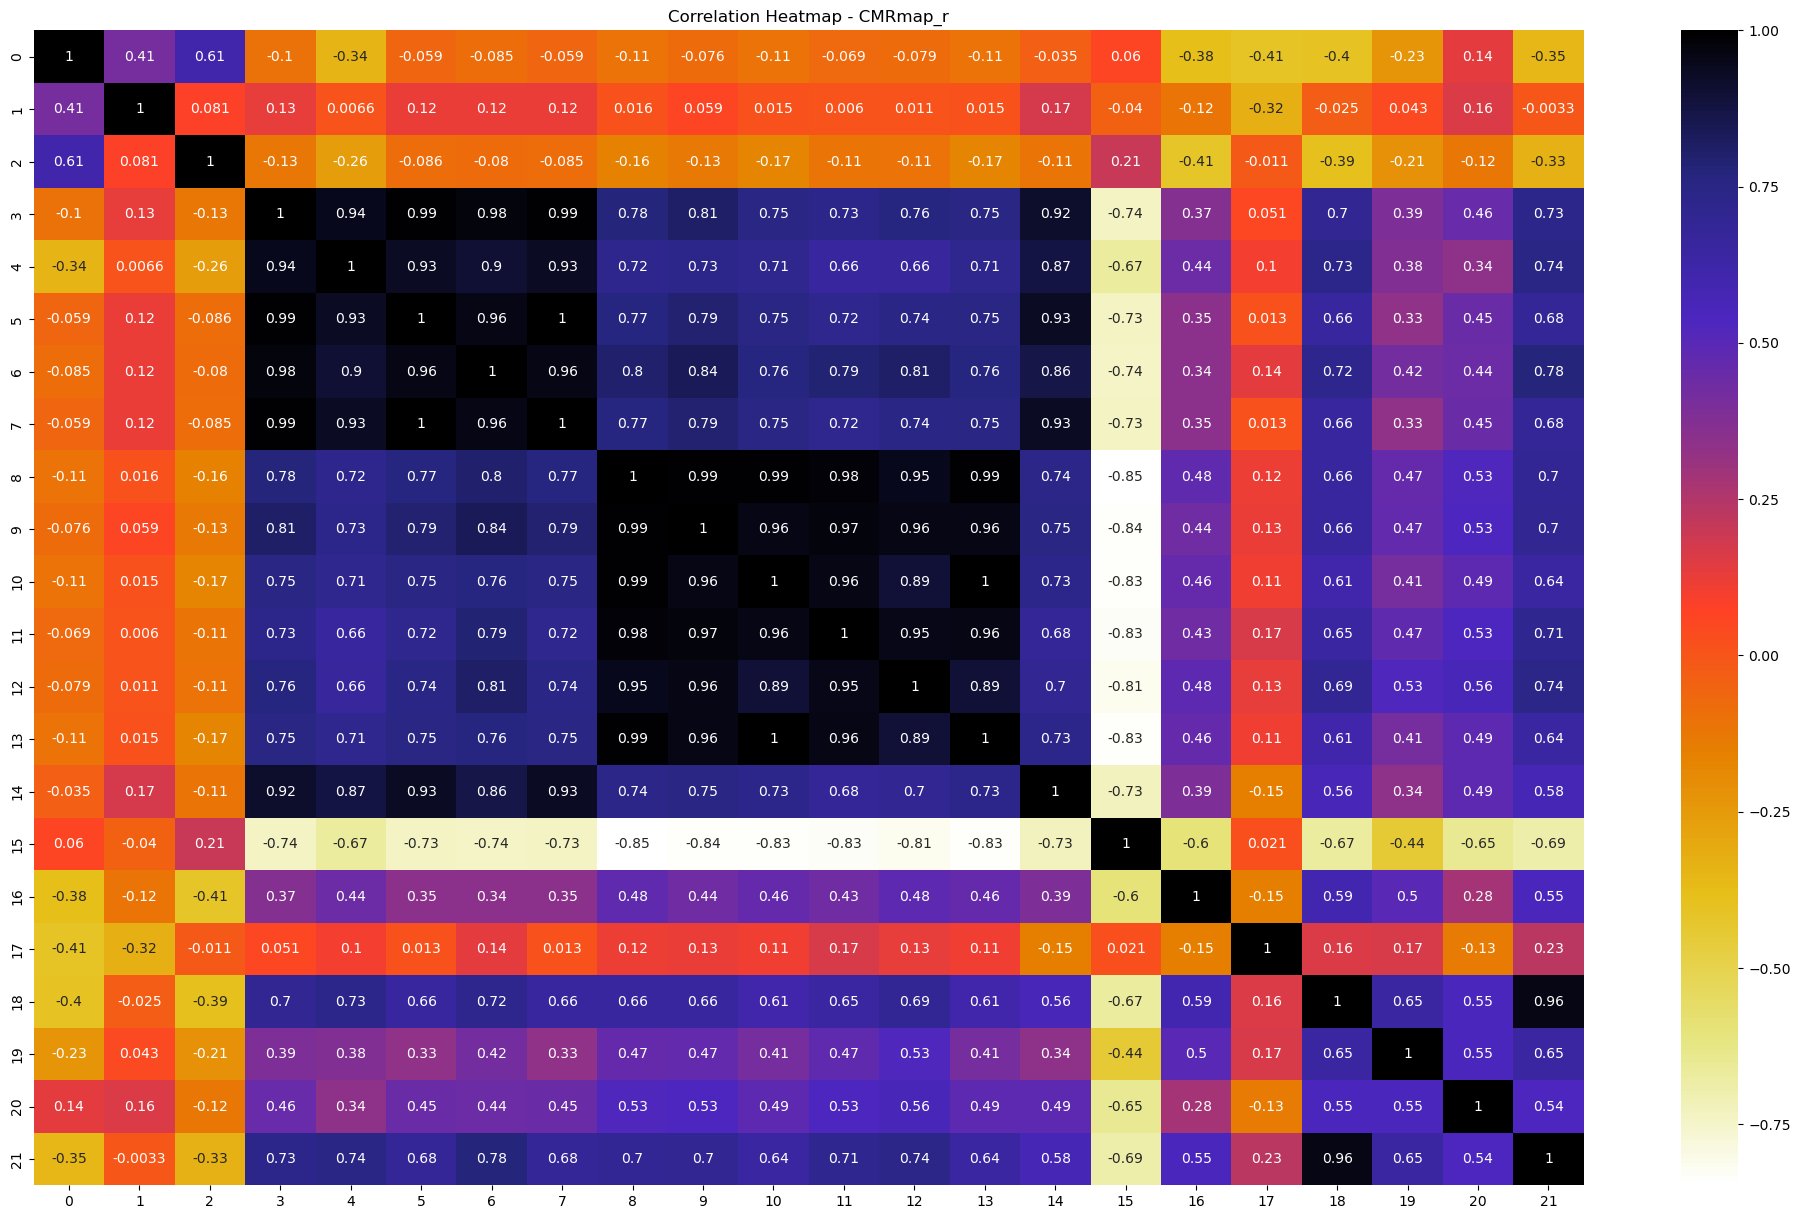

In [62]:
X_train_df = pd.DataFrame(X_train)
df_corr = X_train_df.corr()

# Plot the first heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)
plt.title("Correlation Heatmap - Viridis")
plt.show()

# Plot the second heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("Correlation Heatmap - CMRmap_r")
plt.show()


In [66]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()  # Compute correlation matrix
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check absolute correlation value
                colname = corr_matrix.columns[i]  # Get the column name
                col_corr.add(colname)
    
    return col_corr


In [76]:
X_train_df = pd.DataFrame(X_train)
corr_features = correlation(X_train_df, 0.9)
len(set(corr_features))

11

In [82]:
corr_features
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [86]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train = X_train_df.drop(corr_features,axis=1)
X_test = X_test_df.drop(corr_features,axis=1)

In [88]:
X_train.columns


Index([0, 1, 2, 3, 8, 15, 16, 17, 18, 19, 20], dtype='int64')

In [90]:
X_train.count()

0     156
1     156
2     156
3     156
8     156
15    156
16    156
17    156
18    156
19    156
20    156
dtype: int64

Model Training

Support Vector Machine Model

In [123]:
X_train.shape

(156, 11)

In [133]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [137]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [139]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [141]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [143]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8461538461538461


In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       156 non-null    float64
 1   1       156 non-null    float64
 2   2       156 non-null    float64
 3   3       156 non-null    float64
 4   8       156 non-null    float64
 5   15      156 non-null    float64
 6   16      156 non-null    float64
 7   17      156 non-null    float64
 8   18      156 non-null    float64
 9   19      156 non-null    float64
 10  20      156 non-null    float64
dtypes: float64(11)
memory usage: 13.5 KB


Building a Predictive System

In [150]:
input_data = (119.992,157.302,74.997,0.00784,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


Saving the trained model

In [153]:
import pickle

In [155]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [157]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [159]:
col = pd.DataFrame(X_train)
for column in col.columns:
  print(column)

0
1
2
3
8
15
16
17
18
19
20
